# Assignment 2a

> Load the dataset bike_day_raw.csv, which has the regression target 
cnt. This dataset is hourly bike rentals in the citybike platform. 
The cnt column is the number of rentals, which we want to predict 
from date and weather data. Split the data into a training and a test set using train_test_split.

> Use the LinearRegression class to learn a regression model on this data.

> You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes;
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [207]:
import pandas as pd

# Add a column for outlier
# Can sort the values
def info_about_columns(dataframe, data_science_descriptions=None):
    '''
        A reusable function that will create a dataframe to contain in another 
        dataframe the following : dataypes, Number of Unique Categories, Categories 
        per sample and the type of variable missing values and missing values %
        
        input : A dataframe where data and categories will be retrieved
        series : The data science explamation for each data type
    '''
        
    if data_science_descriptions == None:
        data_science_descriptions = dataframe.copy().dtypes
        data_science_descriptions = \
            data_science_descriptions.replace(data_science_descriptions.to_list(), "NA")
                 
    dataframe_info_about_columns = pd.concat([
          dataframe.dtypes, 
          dataframe.nunique(), 
          round(dataframe.nunique()*100/len(dataframe)),
          data_science_descriptions,
          dataframe.isna().sum(),
          dataframe.isna().sum() * 100 / len(dataframe)], axis=1)
    

    dataframe_info_about_columns.columns=[
                                     'DataType', 
                                     '# of Categories', 
                                     'categories/sample ratio', 
                                     'Data Science Type',
                                     'missing values',
                                     'missing values %']

#     dataframe_info_about_columns = pd.DataFrame()
#     dataframe_info_about_columns['DataTypes'] = dataframe.dtypes
#     dataframe_info_about_columns['# of Categories'] = dataframe.nunique()
#     dataframe_info_about_columns['Data Science Description'] = data_science_descriptions
#     dataframe_info_about_columns['categories/sample ratio'] =  round(dataframe.nunique()*100/len(dataframe))
#     dataframe_info_about_columns['missing values'] = dataframe.isna().sum()
#     dataframe_info_about_columns['missing values %'] = dataframe.isna().sum() * 100 / len(education_dataframe)
    
    return dataframe_info_about_columns

In [208]:
def display_categorical_values(data, dataframe, max_unique_values):
    '''
        input dataframe : Contains the Column name and number of unique values
        output: A dataframe with the unique values for each column 
                if the count is less then or equal to the max_unique_values
    '''
    value_dataframe = pd.DataFrame(columns=['Column', 'Unique Count', 'values'])
    
    
    dataframe_local = dataframe[ dataframe['# of Categories'] <= max_unique_values]
    for index, (name, values) in enumerate(dataframe_local['# of Categories'].iteritems()):
        value_list = data.loc[:,name].value_counts().index.to_list()
        value_dataframe.loc[index] = [name, values, value_list]
        
    return value_dataframe
    

In [209]:
def find_outliers_IRG(data_frame, Column):
    '''
        find the outliers on the whisker plot
        input : the column to check for outliers
        output: The outliers below the quartile 1 and quartile 3
    '''
    column = data_frame[Column]
    q1 = column.quantile(.25)
    q3 = column.quantile(.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
        
    min_outliers = column[ column < lower ]
    max_outliers = column[ column >= upper ]
    
    return (min_outliers, max_outliers)

def show_outlier_irq(data_frame, Column, label):
    '''
        Calculates the outlier will print 2 sections
            1. outliers below quartile 1 will print the 
               min/max for that set of outliers
            2. ourliers above quartile 3 will print the 
               min/max for that set of outliers
         Any section without values will display something.
    '''
    (min_outliers, max_outliers) = find_outliers_IRG(data_frame, Column)
    print("--- " + label)
    print("The number of outliers is ", len(min_outliers) + len(max_outliers))
    if ( len(max_outliers) != 0):
        print("The max outlier is ", max(max_outliers))
        print("The min of the max outlier is ", min(max_outliers))
    
    if len(min_outliers) != 0:
        print("The min outlier is ", min(min_outliers))
        print("The max of the min outlier is ", min(min_outliers))
        
    return min_outliers.index.to_list() + max_outliers.index.to_list()

In [210]:
def mapRowToAmountOfOutliersContain(outlier_row_list):
    dict = {}
    for index, value in enumerate(outlier_row_list):
        key = str(value)
        if key in dict:
            dict[key] = dict[key] + 1
        else:
            dict[key] = 1
    return dict
outlier_row_list = [] 
outlier_row_list = outlier_row_list + show_outlier_irq(diabetes_df, "bmi", "bmi")
outlier_row_list = outlier_row_list + show_outlier_irq(diabetes_df, "s1", "s1")
outlier_row_list = outlier_row_list + show_outlier_irq(diabetes_df, "s2", "s2")
outlier_row_list = outlier_row_list + show_outlier_irq(diabetes_df, "s3", "s3")
outlier_row_list = outlier_row_list + show_outlier_irq(diabetes_df, "s4", "s4")
outlier_row_list = outlier_row_list + show_outlier_irq(diabetes_df, "s5", "s5")
outlier_row_list = outlier_row_list + show_outlier_irq(diabetes_df, "s6", "s6")

row_outlier_cnt = mapRowToAmountOfOutliersContain(outlier_row_list)

# Create the dataframe
outlier_cnt_df = pd.DataFrame([row_outlier_cnt])
outlier_cnt_df = outlier_cnt_df.T
outlier_cnt_df.columns = ['cnt']

outlier_cnt_df.query('cnt > 1')

# Create another dataset that removes the rows with two or more two or more outliers

--- bmi
The number of outliers is  3
The max outlier is  0.17055522598064407
The min of the max outlier is  0.13714305169033927
--- s1
The number of outliers is  8
The max outlier is  0.15391371315651542
The min of the max outlier is  0.12501870313429186
--- s2
The number of outliers is  7
The max outlier is  0.19878798965729408
The min of the max outlier is  0.1251981011367534
--- s3
The number of outliers is  7
The max outlier is  0.18117906039727852
The min of the max outlier is  0.13331776894414826
--- s4
The number of outliers is  4
The max outlier is  0.18523444326019867
The min of the max outlier is  0.14501222150545676
--- s5
The number of outliers is  4
The max outlier is  0.13359728192191356
The min of the max outlier is  0.1323757911721786
--- s6
The number of outliers is  9
The max outlier is  0.13561183068907107
The min of the max outlier is  0.12732761685940217
The min outlier is  -0.13776722569000302
The max of the min outlier is  -0.13776722569000302


,cnt
123,3
161,2
230,2
248,2
287,2
346,2
322,2
23,2


In [211]:
def analyze_model(model,X,y):
    '''
        To provide information that should be available to models
    '''
    print("The score for the training dataset is ", \
          model.score(X_train,y_train))
    print("The score for the testing  dataset is ", \
         model.score(X_test, y_test))
    print("The score ( R^2) is ", model.score(X,y))


In [212]:
weather_for_bike_df = pd.read_csv("bike_day_raw.csv")
weather_for_bike_df.head(2)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801


In [213]:
weather_for_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


In [214]:
info_dataframe = info_about_columns(dataframe=weather_for_bike_df)
info_dataframe

,DataType,# of Categories,categories/sample ratio,Data Science Type,missing values,missing values %
season,int64,4,1.0,NA,0,0.0
mnth,int64,12,2.0,NA,0,0.0
holiday,int64,2,0.0,NA,0,0.0
weekday,int64,7,1.0,NA,0,0.0
workingday,int64,2,0.0,NA,0,0.0
weathersit,int64,3,0.0,NA,0,0.0
temp,float64,499,68.0,NA,0,0.0
atemp,float64,690,94.0,NA,0,0.0
hum,float64,595,81.0,NA,0,0.0
windspeed,float64,650,89.0,NA,0,0.0


In [215]:
display_categorical_values(weather_for_bike_df,info_dataframe,12)

,Column,Unique Count,values
0,season,4,"[3, 2, 1, 4]"
1,mnth,12,"[1, 3, 5, 7, 8, 10, 12, 4, 6, 9, 11, 2]"
2,holiday,2,"[0, 1]"
3,weekday,7,"[6, 0, 1, 2, 3, 4, 5]"
4,workingday,2,"[1, 0]"
5,weathersit,3,"[1, 2, 3]"


In [216]:
# From this we learn that correlation between weatersit and count
# 3 ( weathersit )has the lowest amount of bike rented and 1 has the greatest
weather_for_bike_df[["temp", "atemp", "hum", "windspeed", "weathersit", "cnt"]].tail(20)

,temp,atemp,hum,windspeed,weathersit,cnt
711,0.297500,0.297338,0.538333,0.162937,2,5319
712,0.295833,0.294188,0.485833,0.174129,1,5532
713,0.281667,0.294192,0.642917,0.131229,1,5611
714,0.324167,0.338383,0.650417,0.106350,1,5047
715,0.362500,0.369938,0.838750,0.100742,2,3786
716,0.393333,0.401500,0.907083,0.098258,2,4585
717,0.410833,0.409708,0.666250,0.221404,1,5557
718,0.332500,0.342162,0.625417,0.184092,1,5267
719,0.330000,0.335217,0.667917,0.132463,2,4128
720,0.326667,0.301767,0.556667,0.374383,2,3623


In [217]:
### This section will check for unique value.  I deicde that I want to check each data.

In [218]:
# check unique 
duplicated_dataframe = weather_for_bike_df[["season", "mnth", "weekday"]]
duplicated_dataframe[ duplicated_dataframe.duplicated(keep=False)].head(10)

,season,mnth,weekday
0,1,1,6
1,1,1,0
2,1,1,1
3,1,1,2
4,1,1,3
5,1,1,4
6,1,1,5
7,1,1,6
8,1,1,0
9,1,1,1


In [219]:
# Question for the homework : Should the duplicates be discarded or not.  I do not think 
# they should discartded since the tempatures are diffrernt could imply these are two 
# different stores.
weather_for_bike_df.iloc[0:10:7,:]

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
7,1,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959


In [220]:
### Handling Outliers

<Figure size 640x480 with 0 Axes>

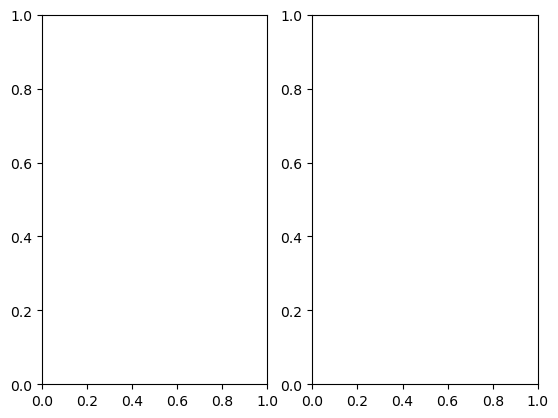

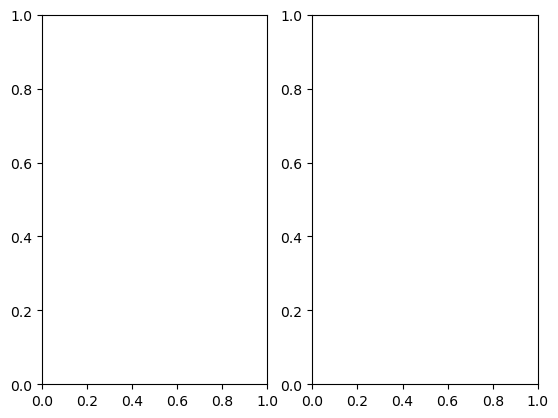

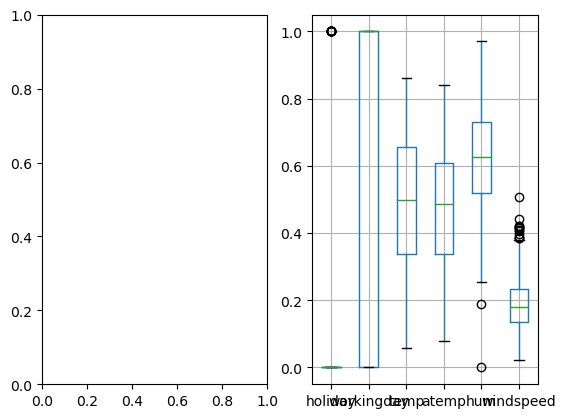

In [221]:
# Question : How should the outliers be handled.
import matplotlib.pyplot as plt
b = weather_for_bike_df.\
    drop(['cnt', 'mnth', 'weekday', 'season', 'weathersit'], axis=1).boxplot()
plt.show()

In [222]:
outlier_series = find_outliers_IRG(weather_for_bike_df, "windspeed")
print("The number of outliers for windspeed is ", len(outlier_series[1]))
print("The number of values are ", weather_for_bike_df.shape[0])

The number of outliers for windspeed is  13
The number of values are  731


<b>Analysis of outliers and scaling</b>

> * Outliers -- There are only 17 out 731 which is less than 3% of the data is extreme.  
> No work will be done

>* Scaling -- The values are alreaedy very close and I will not be scaling since it is 
>  not needed

In [223]:
## Mahcine Learning with Linear Regressoun

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into a training set / testing set
X = weather_for_bike_df.drop('cnt', axis=1)
y = weather_for_bike_df['cnt']
(X_train, X_test, y_train, y_test) = \
    train_test_split(X,y,test_size=.2,random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((584, 10), (147, 10), (584,), (147,))

In [225]:
# Linear Reqression without scaling

In [226]:
linearRegression = LinearRegression()
linearRegression.fit(X_train,y_train)
analyze_model(linearRegression,X_test,y_test)

#
# Calculate the mean squarey
#
y_predict = linearRegression.predict(X_test)
"Mean Square Error", mean_squared_error(y_test, y_predict)

The score for the training dataset is  0.517644587434399
The score for the testing  dataset is  0.5518626278474863
The score ( R^2) is  0.5518626278474863


('Mean Square Error', 1796978.1114466998)

# Assignment 2b

> * Load the diabetes dataset using sklearn.datasets.load_diabetes.
> * Scale the dataset (you can be creative and make pipelines)
> * Apply LinearRegression,
> * Apply Ridge and do grid search
> * Apply Lasso and do grid search
> *Visualize the coefficients.

In [227]:
#Load the diabetes dataset using sklearn.datasets.load_diabetes.
diabetes_raw = load_diabetes()

In [228]:
diabetes_raw.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

## Create the dataset and display information about the dataset

In [229]:
x_diabetes_df = pd.DataFrame(data=diabetes_raw.data, columns=diabetes_raw.feature_names)
x_diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [230]:
y_diabetes_df = pd.DataFrame(data=diabetes_raw.target, columns=['Target'])
y_diabetes_df

,Target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [231]:
print(diabetes_raw.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [232]:
# Get an idea of what processing we need to do
# It looks like there is 
info_about_columns(x_diabetes_df, None)

,DataType,# of Categories,categories/sample ratio,Data Science Type,missing values,missing values %
age,float64,58,13.0,NA,0,0.0
sex,float64,2,0.0,NA,0,0.0
bmi,float64,163,37.0,NA,0,0.0
bp,float64,100,23.0,NA,0,0.0
s1,float64,141,32.0,NA,0,0.0
s2,float64,302,68.0,NA,0,0.0
s3,float64,63,14.0,NA,0,0.0
s4,float64,66,15.0,NA,0,0.0
s5,float64,184,42.0,NA,0,0.0
s6,float64,56,13.0,NA,0,0.0


In [233]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## Analyze the Data

In [234]:
# Check if there are any duplicates the dataframe with and without duplicates.
result = x_diabetes_df.drop_duplicates().shape == x_diabetes_df.shape
print("Where there any duplicates:", not result)

Where there any duplicates: False


In [235]:
info_about_columns(x_diabetes_df, None)

,DataType,# of Categories,categories/sample ratio,Data Science Type,missing values,missing values %
age,float64,58,13.0,NA,0,0.0
sex,float64,2,0.0,NA,0,0.0
bmi,float64,163,37.0,NA,0,0.0
bp,float64,100,23.0,NA,0,0.0
s1,float64,141,32.0,NA,0,0.0
s2,float64,302,68.0,NA,0,0.0
s3,float64,63,14.0,NA,0,0.0
s4,float64,66,15.0,NA,0,0.0
s5,float64,184,42.0,NA,0,0.0
s6,float64,56,13.0,NA,0,0.0


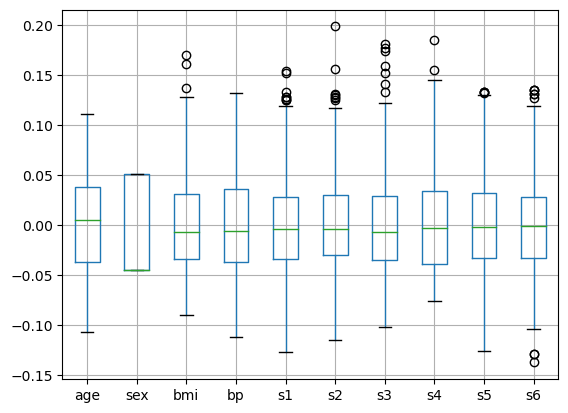

In [236]:
boxplot=x_diabetes_df.boxplot()
plt.show()

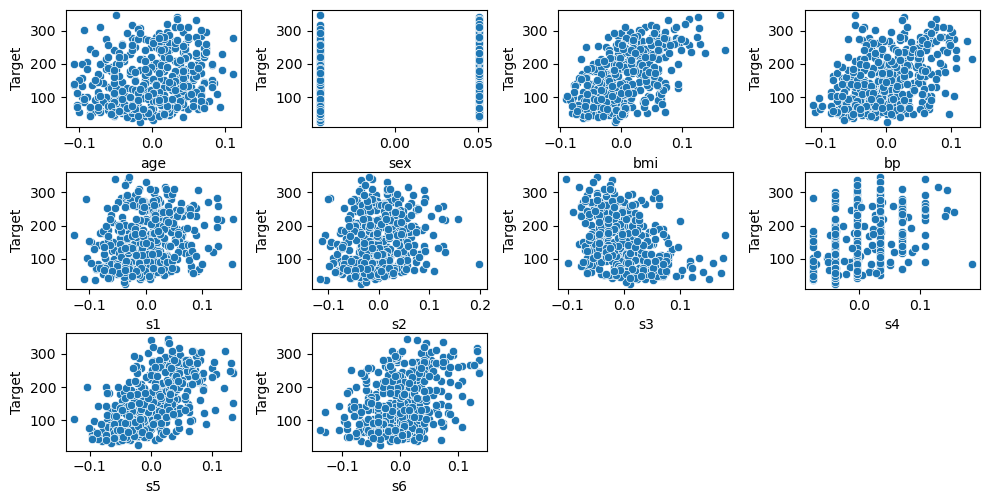

In [237]:
fig, ax = plt.subplots(3,4,figsize=(10,5))
fig.tight_layout()
ax_ravel = np.ravel(ax)
data = pd.concat([x_diabetes_df, y_diabetes_df], axis=1)
for index,feature in enumerate(x_diabetes_df.columns):
    sns.scatterplot(data=data, x=feature, y='Target', ax=ax_ravel[index])
ax_ravel[10].set_visible(False)
ax_ravel[11].set_visible(False)
plt.show()

In [238]:
x_diabetes_df.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-1.444295e-18,2.543215e-18,-2.255925e-16,-4.854086e-17,-1.428596e-17,3.898811e-17,-6.028360e-18,-1.788100e-17,9.243486e-17,1.351770e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [239]:
# This idea need some more research and discussion.   I have disabled it for now.
#print("The Size of the original dataset is ", diabetes_df.shape)
#indexes = [ eval(index) for index in outlier_cnt_df.query('cnt > 1').index ]
#diabetes_less_outliers_df = diabetes_df.copy().drop(indexes)
#print("The Size of the dataset without some of the outiliers is ", diabetes_less_outliers_df.shape)
# Show the boxplot again to get a visual idea of how many outlier were remove
#diabetes_less_outliers_df.boxplot()
#plt.show()

In [240]:
# Creating the Training / Testing Sets.
features_train,  features_test, dependent_train, dependent_test = \
    train_test_split(diabetes_df, diabetes_raw.target, test_size=.2)
print("Creating Training Datasets")
print("Train: ", features_train.shape, dependent_train.shape)
print("Test:  ", features_test.shape, dependent_test.shape)

Creating Training Datasets
Train:  (353, 11) (353,)
Test:   (89, 11) (89,)


In [241]:
# Do the preprocessing
standardScalar = StandardScaler().fit(features_train)
features_train_scaled = standardScalar.transform(features_train)
features_test_scaled =  standardScalar.transform(features_test)


In [242]:
# Perform a linear reqression
score_linear_regression = cross_val_score(LinearRegression(), features_train_scaled, dependent_train, cv=10)
print("Ridge regresion with scaling ", score_linear_regression)

Ridge regresion with scaling  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [243]:
# Peform a linear ridge regression
score_ridge_regression = cross_val_score(Ridge(), features_train_scaled, dependent_trian, cv=10)
print("Linear regresion with scaling ", score_ridge_regression)

Linear regresion with scaling  [-0.01452108 -0.03891951 -0.12778218  0.00625519 -0.02893339 -0.13102693
 -0.11774725 -0.00184811 -0.11875998 -0.25494544]


In [244]:
# Do a grid search
alphas = list(np.arange(0, 20, .1))
parameter_grid = { 'alpha': alphas, 'solver':['auto']}
grid = GridSearchCV(Ridge(), parameter_grid, cv=10, return_train_score=True)
grid.fit(features_train_scaled, dependent_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                   0.6000000000000001, 0.7000000000000001, 0.8,
                                   0.9, 1.0, 1.1, 1.2000000000000002, 1.3,
                                   1.4000000000000001, 1.5, 1.6,
                                   1.7000000000000002, 1.8, 1.9000000000000001,
                                   2.0, 2.1, 2.2, 2.3000000000000003,
                                   2.4000000000000004, 2.5, 2.6, 2.7,
                                   2.8000000000000003, 2.9000000000000004, ...],
                         'solver': ['auto']},
             return_train_score=True)

In [245]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_solver,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001112,0.000499,0.000600,0.000135,0.0,auto,"{'alpha': 0.0, 'solver': 'auto'}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,0.000740,0.000290,0.000438,0.000129,0.1,auto,"{'alpha': 0.1, 'solver': 'auto'}",1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.117857e-08
2,0.000718,0.000264,0.000457,0.000119,0.2,auto,"{'alpha': 0.2, 'solver': 'auto'}",0.999999,0.999999,0.999999,...,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,4.452928e-08
3,0.000726,0.000225,0.000456,0.000128,0.3,auto,"{'alpha': 0.30000000000000004, 'solver': 'auto'}",0.999999,0.999998,0.999998,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,9.979435e-08
4,0.000712,0.000192,0.000460,0.000114,0.4,auto,"{'alpha': 0.4, 'solver': 'auto'}",0.999998,0.999996,0.999996,...,0.999997,0.999997,0.999997,0.999997,0.999997,0.999996,0.999997,0.999997,0.999997,1.767377e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000547,0.000003,0.000361,0.000002,19.5,auto,"{'alpha': 19.5, 'solver': 'auto'}",0.995907,0.993284,0.993575,...,0.994536,0.994056,0.994153,0.993921,0.994251,0.993842,0.994202,0.994673,0.994265,2.698865e-04
196,0.000583,0.000065,0.000396,0.000058,19.6,auto,"{'alpha': 19.6, 'solver': 'auto'}",0.995870,0.993224,0.993518,...,0.994487,0.994003,0.994101,0.993867,0.994200,0.993788,0.994150,0.994625,0.994214,2.721080e-04
197,0.000542,0.000004,0.000358,0.000003,19.7,auto,"{'alpha': 19.700000000000003, 'solver': 'auto'}",0.995834,0.993164,0.993460,...,0.994438,0.993950,0.994049,0.993813,0.994148,0.993733,0.994099,0.994577,0.994162,2.743340e-04
198,0.000544,0.000014,0.000362,0.000013,19.8,auto,"{'alpha': 19.8, 'solver': 'auto'}",0.995797,0.993104,0.993403,...,0.994389,0.993897,0.993997,0.993758,0.994097,0.993679,0.994047,0.994529,0.994111,2.765645e-04


/Users/charles/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


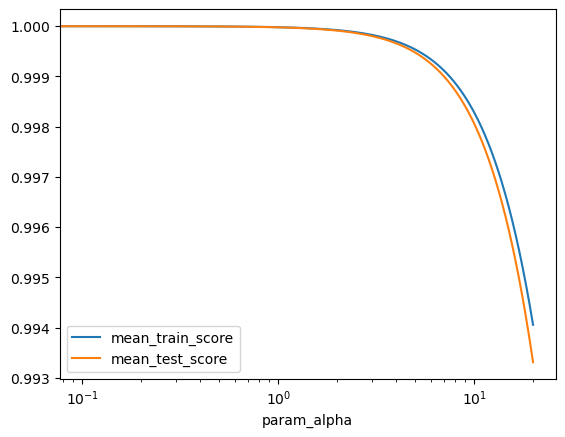

In [246]:
results.plot("param_alpha", ['mean_train_score', 'mean_test_score'], logx=True)
plt.show()

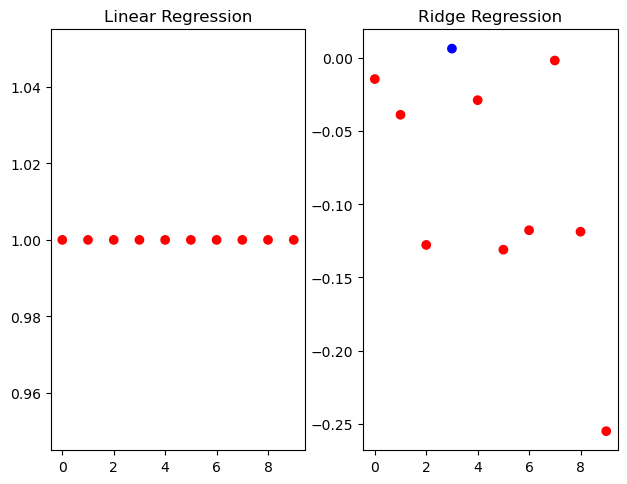

In [256]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()

ax_ravel = np.ravel(ax)

ax[0].scatter(range(X_train.shape[1]), score_linear_regression, c=np.sign(score_linear_regression), cmap="bwr_r")
ax[0].set_title("Linear Regression")

ax[1].scatter(range(X_train.shape[1]), score_ridge_regression, c=np.sign(score_ridge_regression), cmap="bwr_r")
ax[1].set_title("Ridge Regression")

plt.show()

In [ ]:
# Lasso Regression 

In [258]:
param_grid = { 'alpha': np.logspace(-3,0,10) }
param_grid

{'alpha': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
        0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])}

In [267]:
grid = GridSearchCV(Lasso(normalize=True, max_iter=100000), param_grid, cv=10, return_train_score=True)
grid.fit(features_train, dependent_train)

/Users/charles/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/charles/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the p

/Users/charles/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/charles/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the p

/Users/charles/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/charles/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the p

GridSearchCV(cv=10, estimator=Lasso(max_iter=100000, normalize=True),
             param_grid={'alpha': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])},
             return_train_score=True)

In [274]:
print("best parameters", grid.best_params_)
print("best score", grid.best_score_)
dependent_train.shape

best parameters {'alpha': 0.001}
best score 0.9999999424580066


(353,)

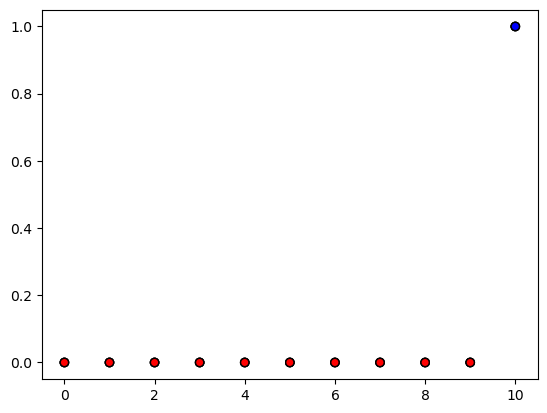

In [278]:
plt.scatter(range(features_train.shape[1]), grid.best_estimator_.coef_, 
            c=np.sign(grid.best_estimator_.coef_), cmap="bwr_r", edgecolor='k')
plt.show()